Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset
df_customer = pd.read_csv("/content/drive/MyDrive/DATA STARBUCKS/profile.csv")
df_customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


Data Wrangling

Drop the unnecessary column.
Column 'Unnamed: 0' is not useful hence to be dropped.

In [ ]:
df_customer = df_customer.drop('Unnamed: 0', axis = 1)

Check for missing values

In [ ]:
df_customer.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

For df_customer, there are 2175 missing values in column gender and the same number of missing values in columnincome. Need to check whether these missing values are from the same observations.

In [ ]:
missing_gender = df_customer[df_customer['gender'].isna()]
missing_income = df_customer[df_customer['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])

2175

All missing values in columns gender and income are from the same observations.

Logically,income is likely to play an important role in customer behaviour, hence observations with missing income will be removed from the dataset. This means 12.8% of the observations will be removed which is not ideal, however the alternative (replacing NaNs with the average or the median) will make our analysis less robust. As there are enough obsevations in our data for analysis, this should not have an important impact on the analysis (unless observations removed share some common behavior, inthat case, removing them will skewer the sample distribution).

Remove rows with missing values in df_customer

In [ ]:
id_to_remove = missing_income['id']
df_customer_no_na = df_customer[~df_customer['id'].isin(id_to_remove)]
df_customer_no_na = df_customer_no_na.reset_index(drop = True)
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


There are no missing values in df_customer_no_na.

Check data types

Check data types in df_customer_no_na

In [ ]:
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


Column became_member_on are integers, which should be coverted to datetime type.

In [ ]:
df_customer_no_na['became_member_on'] = pd.to_datetime(df_customer_no_na['became_member_on'], format = '%Y%m%d')

Save checkpoints after data cleaning



In [ ]:
customers = df_customer_no_na.copy()

Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) on customer profile data will simply focus on describing the data with univariate analysis.

Univariate Analysis - gender

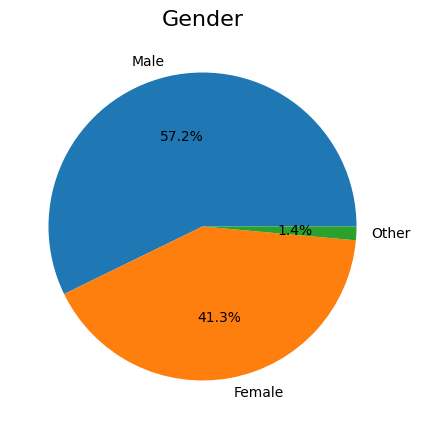

In [ ]:
wedge_size =  df_customer_no_na['gender'].value_counts()
wedge_label = ['Male', 'Female', 'Other']
plt.figure(figsize = (5,5))
plt.pie(x = wedge_size, labels = wedge_label, autopct = '%1.1f%%')
plt.title('Gender', fontsize = 16)
plt.show()

Observations: There are more males (57.2%) than females (41.3%) customers, and a small share (1.4%) of customers of other genders.

Univariate Analysis - age

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


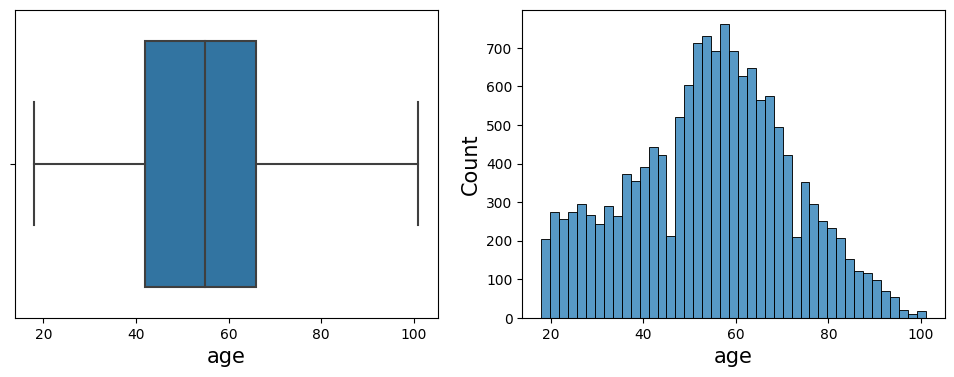

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'age', ax = axs[0])
sns.histplot(data = customers, x = 'age', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['age'].describe())

Observations :


*   The youngest customer is 18 years old and the oldest is 101 years old.
*   The age of the customers roughly follows a normal distribution with the mean and the standard deviation equal to 54 and 17.

Next, I will divide customers into age groups.




Divide customers into age groups

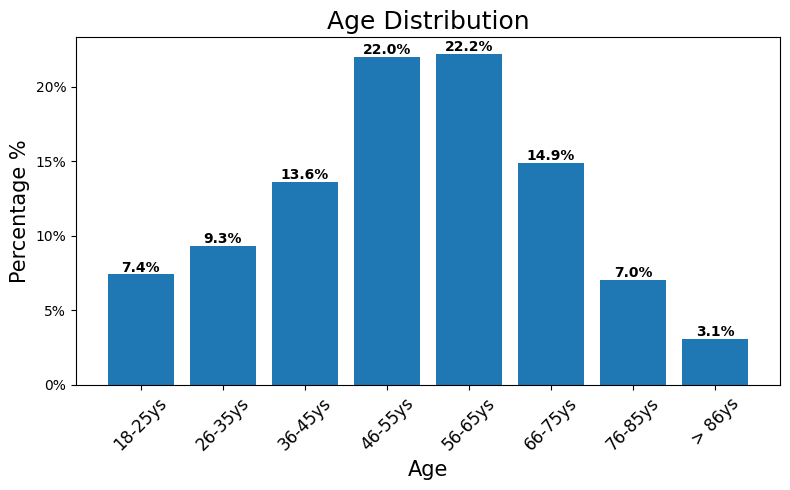

In [ ]:
# Create a new column `age_group`
age_group = pd.cut(customers['age'],
      bins = [customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()],
      labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys'])
customers['age_group'] = age_group

# Visualize customers by age groups
age_group_percentage = (customers.value_counts('age_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Age Distribution', fontsize = 18)

bar_plot = plt.bar(x = age_group_percentage.index.values, height = age_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(age_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

Observations

*   The largest age group of customers is 56-65 years olds, closely followed by age group 46-55 years olds. The third largest age group is 66-75 years olds.
*   Top 3 age groups account for approximately 60% of customers.
*   This makes sense as people between 46 - 75 years old tend to be less busy than younger people, therefore have more time to visit cafes. They also tend to have better mobility than more senior people (above 75 years old), therefore are more likely to be our customers.

It would be very interesing to investigate how age affects customers response to offers and their purchasing habbits. This will be investigated in a later section.








Univariate Analysis - income

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


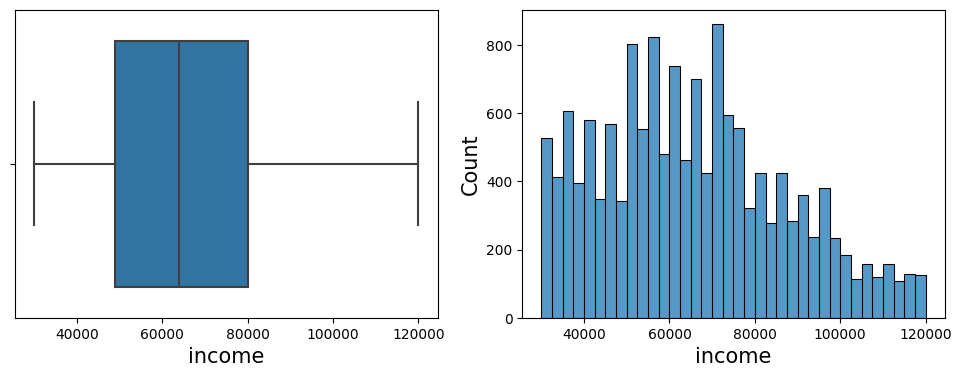

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'income', ax = axs[0])
sns.histplot(data = customers, x = 'income', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['income'].describe())

Divide customers into income groups

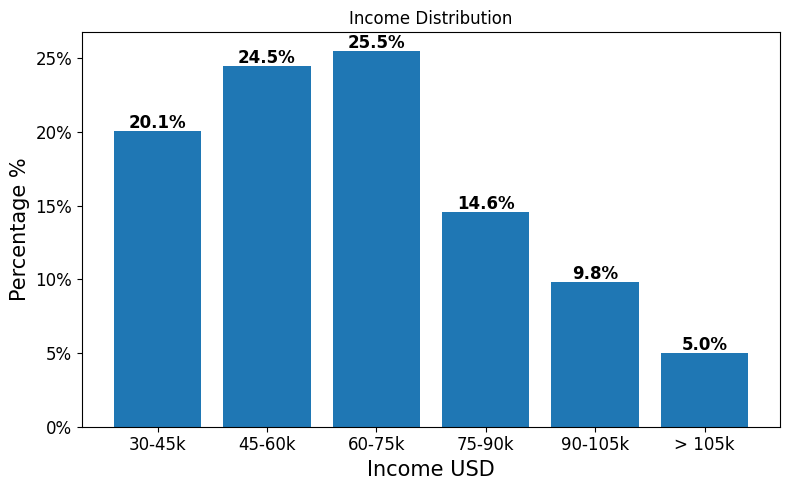

In [ ]:
# Create a new column `income_group`
income_group = pd.cut(customers['income'],
      bins = [customers['income'].min(), 45000, 60000, 75000, 90000, 105000, customers['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
customers['income_group'] = income_group

# Visualize customers by income groups
income_group_percentage = (customers.value_counts('income_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,30,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Income USD', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Income Distribution')

bar_plot = plt.bar(x = income_group_percentage.index.values, height = income_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold', fontsize = 12)

plt.tight_layout()
plt.show()

Observations:

*   Income of customers has a range of 30k to 120k, with an average of 65.4k.
*   Top 2 income groups consist of customers with annaul income of 60-75k and 45-60k. These account for approximately 50% of customers.
*   The income distribution among the customers may, to a large extent, in line with that over the whole population, except that people with extremely low income might find it hard to afford regular cafe visits, while people with extremely high income may prefer other ways to enjoy their coffee.


I will explore how income affects customer response to offers and their spendings in a later section.

Univariate Analysis - became_member_on

In [ ]:
# Create a new df focusing on the time customers became members
df_member = customers[['id', 'became_member_on']]

# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(year = df_member.became_member_on.dt.year,
                             month = df_member.became_member_on.dt.month,
                             day = df_member.became_member_on.dt.day,
                             month_name = df_member.became_member_on.dt.month_name(),
                             day_of_week = df_member.became_member_on.dt.weekday,
                             day_name = df_member.became_member_on.dt.day_name())
df_member.head(3)

,id,became_member_on,year,month,day,month_name,day_of_week,day_name
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,2017,7,15,July,5,Saturday
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,2017,5,9,May,1,Tuesday
2,e2127556f4f64592b11af22de27a7932,2018-04-26,2018,4,26,April,3,Thursday


Member growth by year

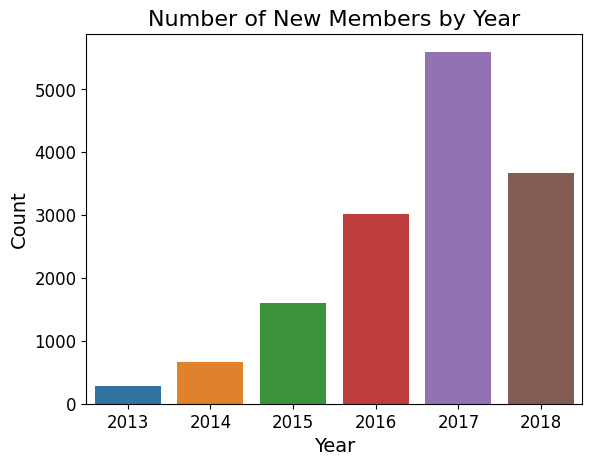

In [ ]:
sns.countplot(data = df_member, x = 'year')
plt.title('Number of New Members by Year', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

Daily member growth

In [ ]:
# Create a time series with the number of new member on each day
p = df_member.value_counts('became_member_on').sort_index()
df_member_growth = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of New Members'])

In [ ]:
# There are four phases with clearly different daily growth
phase_1 = df_member_growth.loc['2013-july': '2015-july']
len_phase_1 = phase_1.shape[0]
mean_phase_1 = phase_1.mean().values

phase_2 = df_member_growth.loc['2015-august': '2017-july']
len_phase_2 = phase_2.shape[0]
mean_phase_2 = phase_2.mean().values

phase_3 = df_member_growth.loc['2017-august': '2018-jan']
len_phase_3 = phase_3.shape[0]
mean_phase_3 = phase_3.mean().values

phase_4 = df_member_growth.loc['2018-feb': '2018-july']
len_phase_4 = phase_4.shape[0]
mean_phase_4 = phase_4.mean().values

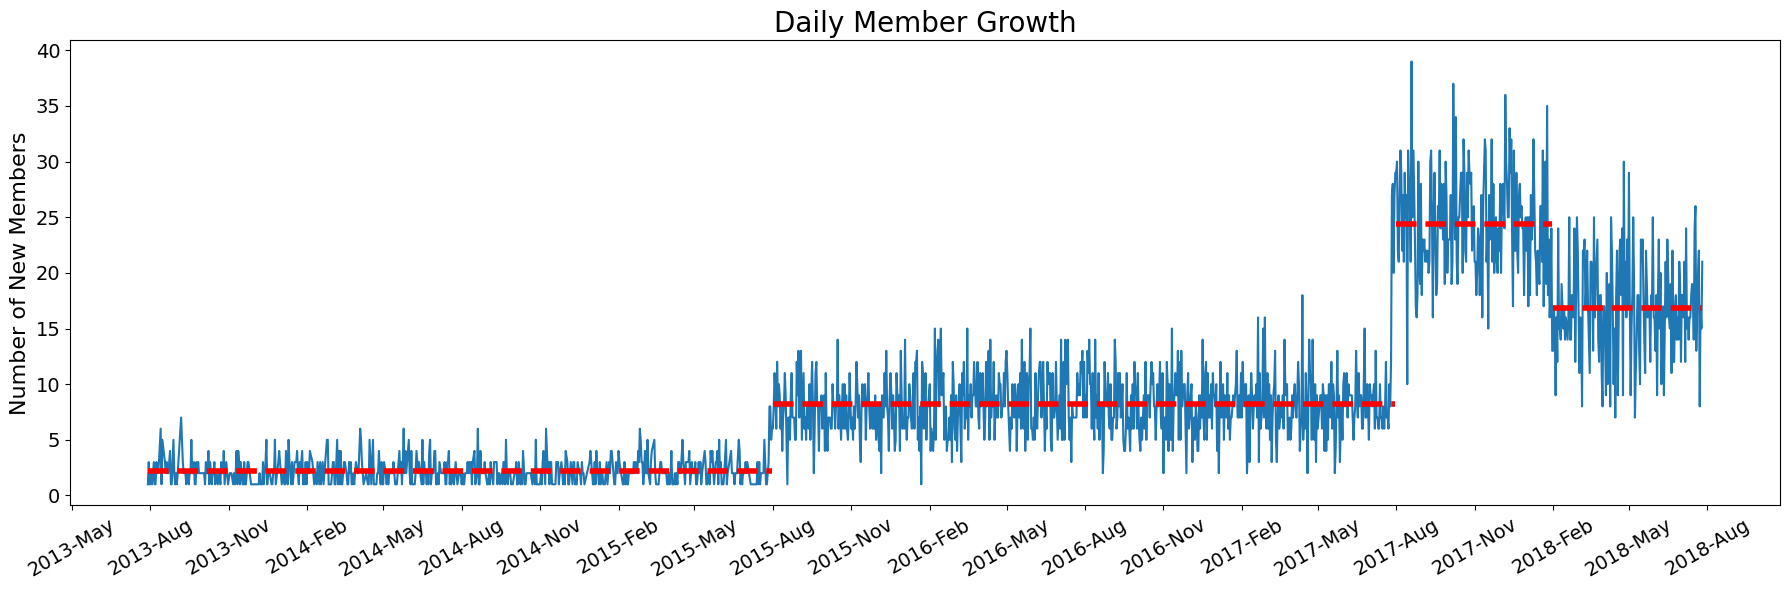

In [ ]:
# Visualize
plt.figure(figsize = (18,6))
ax = sns.lineplot(x = df_member_growth.index.values, y = df_member_growth['Number of New Members'])
date_format = mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))

plt.plot(phase_1.index.values, np.ones(len_phase_1)*mean_phase_1, '--r', lw = 4)
plt.plot(phase_2.index.values, np.ones(len_phase_2)*mean_phase_2, '--r', lw = 4)
plt.plot(phase_3.index.values, np.ones(len_phase_3)*mean_phase_3, '--r', lw = 4)
plt.plot(phase_4.index.values, np.ones(len_phase_4)*mean_phase_4, '--r', lw = 4)

plt.xticks(text = ax.xaxis.get_label(), fontsize = 14, rotation = 30)
plt.yticks(text = ax.yaxis.get_label(), fontsize = 14)
plt.ylabel('Number of New Members', fontsize = 16)
plt.title('Daily Member Growth', fontsize = 20)
plt.tight_layout()
plt.show()

Observations:

*   The data contains customers became members from July 2013 to July 2018.
*   Very few customers (~2.2) chose to become a member from 2013 to mid-2015.
*   The number of new members started to pick up from mid-2015 and really took off from mid-2017. The company must have had some sucessful compaigns around mid of 2015 and mid of 2017 that drastically boosted member growth.
*   However, from early 2018 the daily number growth dropped by 31% (from 24.4 to 16.8). Maybe some new strategies were applied then and had a negative impact on the member growth.


Next I will explore whether there were specific months in a year or days in a week that people were more likely to sign up.


Member growth by Month

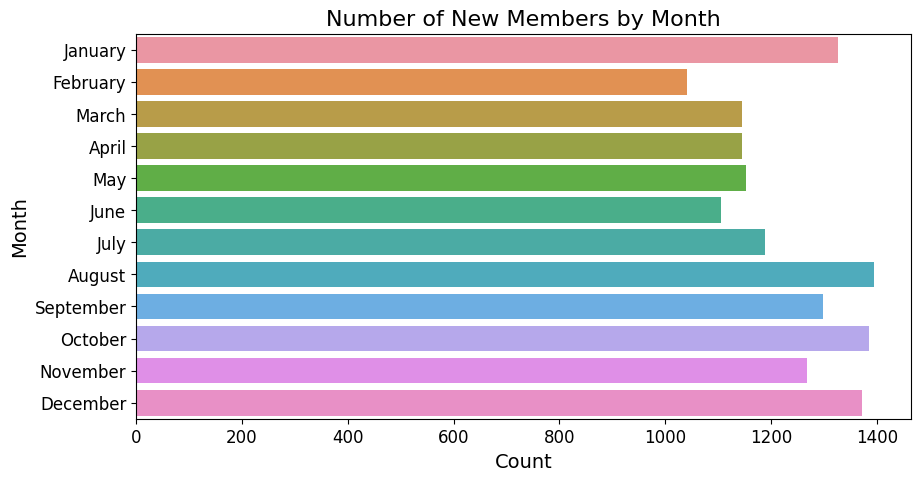

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('month'), y = 'month_name')
plt.title('Number of New Members by Month', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Month', fontsize = 14)
plt.show()

Member growth by weekday

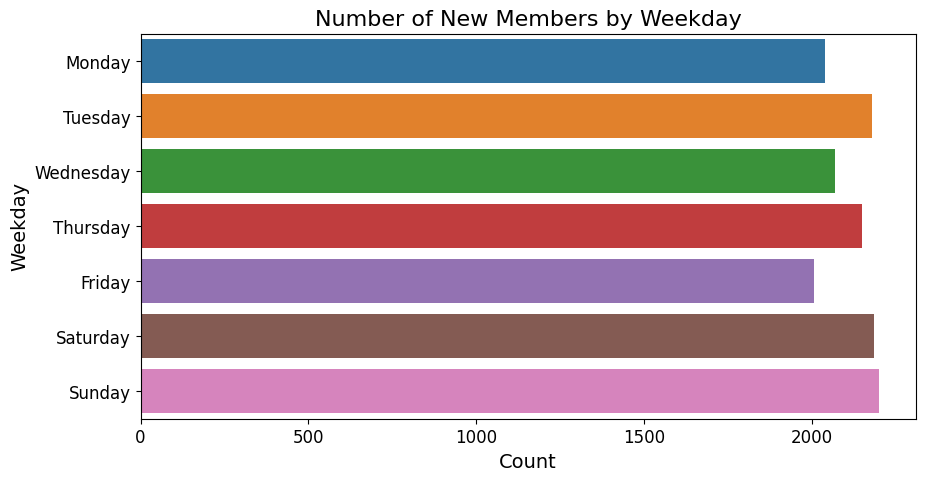

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('day_of_week'), y = 'day_name')
plt.title('Number of New Members by Weekday', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Weekday', fontsize = 14)
plt.show()

Observations:

*   The months saw most customers becoming memebrs was August, followed by October and Decemebr.
*   There were least new memebrs in Feburary on average.
*   In terms of days in a week, unsuprisingly, weekend saw the higher member growth than weekdays. Tuesday had the highest member growth among weekdays.
*   There were least new memebrs on Friday on average.





Bivariate Analysis - age vs gender

              age
gender           
F       57.544950
M       52.116690
O       54.400943


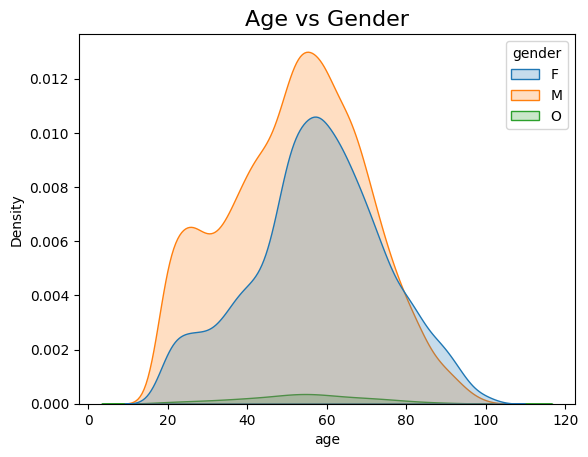

In [ ]:
print(customers.groupby('gender').agg({'age': 'mean'}))
sns.kdeplot(data = customers, x = 'age', hue = 'gender', fill = True)
plt.title('Age vs Gender', fontsize = 16)
plt.show()

Observations:

*   The number of female and male cutomers roughly follows a normal distribution.
*   There is a larger proportion of young customers in males than females.
*   Female customers, male customers and cutomers of other genders are 57.5, 52.1 and 54.4 year old on average.





Bivariate Analysis - income vs gender

              income
gender              
F       71306.412139
M       61194.601603
O       63287.735849


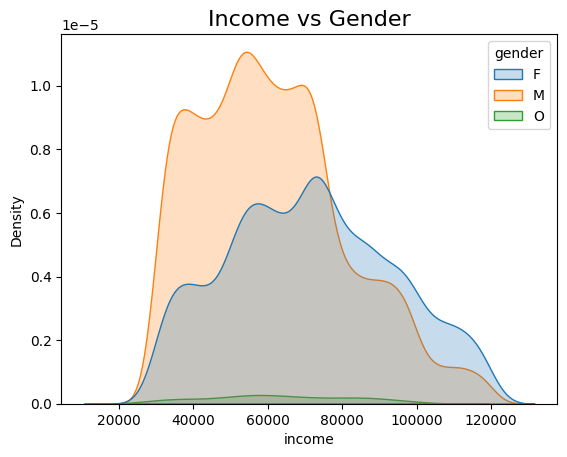

In [ ]:
print(customers.groupby('gender').agg({'income': 'mean'}))
sns.kdeplot(data = customers, x = 'income', hue = 'gender', fill = True)
plt.title('Income vs Gender', fontsize = 16)
plt.show()

Observations:


*   Income of female customers roughly follows a normal distribution. This indicates female customers accross the whole income range enjoys the company's products.
*   Income of male customers is skewed to the right. This means among the company's male customers, more people are on the lower half of the income spectrum (among customers, not among US population, as shown below).
*   Female customers have a much higher average income than other genders. This maybe becase they are on average older than other gender groups, assumming older customers have higher incomes (it will be checked whether this assumption is true next).
*   Average income of female customers, male customers and cutomers of other genders are 71k, 61k and 63k.




Bivariate Analysis - income vs age

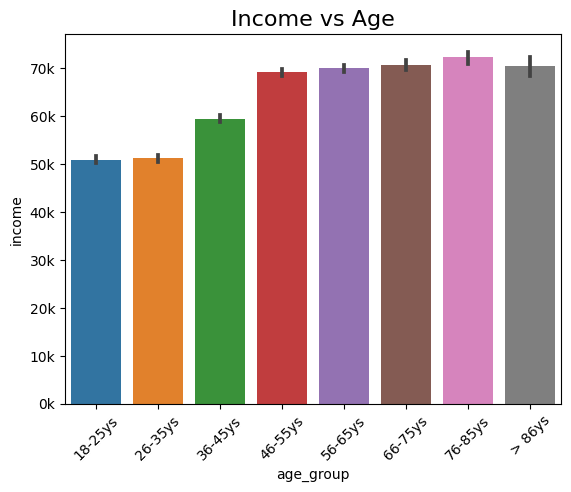

In [ ]:
sns.barplot(data = customers, x = 'age_group', y = 'income')
plt.xticks(rotation = 45)
ytick_labels = [str(i) + 'k' for i in (np.arange(0, 80000, 10000) / 1000).astype(int)]
plt.yticks(np.arange(0, 80000, 10000), labels = ytick_labels)
plt.title('Income vs Age', fontsize = 16)
plt.show()

Observations:

*   Customers in the two younger age groups (18-35 years old) has an average annual income of about 51k USD. The middle age groups (36-55 years old) has an average annual income of about 65k. All age groups above 56 years old have very similar average annual income of round 70k. On average, older customers of the company have higher incomes.
*   The company's customers in all age groups have a much higher average income than the median income of US citizens (30,119 USD in 2018). I use the median income of 2018 as the benchmark (rather than a more recent year) because in this data set, the latest time a customer became member was July 2018. Profile data, such as income, is most likely collected when the customers signed up to become memebrs and this infomation is usually left unupdated by most people. Hence, it makes more sense to compare customer income with that of the population of the year customers last became members.





Conclusion:

*   There are more males (57.2%) than females (41.3%) customers, and a small amount (1.4%) of customers of other genders.
*   Customer age ranges from 18 to 101, roughly following a normal distribution with the mean and standard deviation being 54 and 17. Customers in top 3 age groups (46-75 years old) account for 60% of all customers.
*   Customer income (30 - 120k) is skewed to the right, having a mean of 65.4k and a standard deviation of 21.6k. Customers with a income between 45k-75k account for approximately 50% of all customers.
*   In general, customers in younger age groups have an average income lower than those in more senior age groups. Customers in the two younger age groups (18-35 years old) has an average annual income of about 51k. The middle age groups (36-55 years old) has an average annual income of about 65k. All age groups above 56 years old have very similar average annual income of round 70k.
*   There is a higher proportion of young people in male customer than in other genders, and (therefore) male customers have a lower average income than other gender groups.







